## Import Libraries

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
%matplotlib inline

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [255]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    mape = mean_absolute_percentage_error (actual, pred)
    score = r2_score(actual, pred)
    return print(" r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse, "\n","mape:",mape)

In [2]:
path_local="C:/AWS/project1/ml deployment project/final_scout_not_dummy.csv"

In [38]:
df0 = pd.read_csv(path_local)

In [39]:
df0.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",...,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


## Exploratory Data Analysis and Visualization

In [40]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [41]:
df0.shape

(15915, 23)

In [42]:
df0.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
count,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000
mean,18024.380584,32089.995708,5.937355,1.389695,1.042853,88.499340,0.247063,1428.661891,1337.700534,4.832124
std,7381.679318,36977.214964,0.704772,1.121306,0.339178,26.674341,0.431317,275.804272,199.682385,0.867530
min,4950.000000,0.000000,5.000000,0.000000,0.000000,40.000000,0.000000,890.000000,840.000000,3.000000
25%,12850.000000,1920.500000,5.000000,0.000000,1.000000,66.000000,0.000000,1229.000000,1165.000000,4.100000
50%,16900.000000,20413.000000,6.000000,1.000000,1.000000,85.000000,0.000000,1461.000000,1295.000000,4.800000
75%,21900.000000,46900.000000,6.000000,2.000000,1.000000,103.000000,0.000000,1598.000000,1472.000000,5.400000
max,74600.000000,317000.000000,8.000000,3.000000,4.000000,294.000000,1.000000,2967.000000,2471.000000,9.100000


In [43]:
df0.select_dtypes(exclude=['number']).nunique()

make_model                9
body_type                 8
vat                       2
Type                      5
Fuel                      4
Comfort_Convenience    6196
Entertainment_Media     346
Extras                  659
Safety_Security        4442
Paint_Type                3
Upholstery_type           2
Gearing_Type              3
Drive_chain               3
dtype: int64

In [44]:
fig=plt.figure(figsize=(20,20),dpi=200)

<Figure size 4000x4000 with 0 Axes>

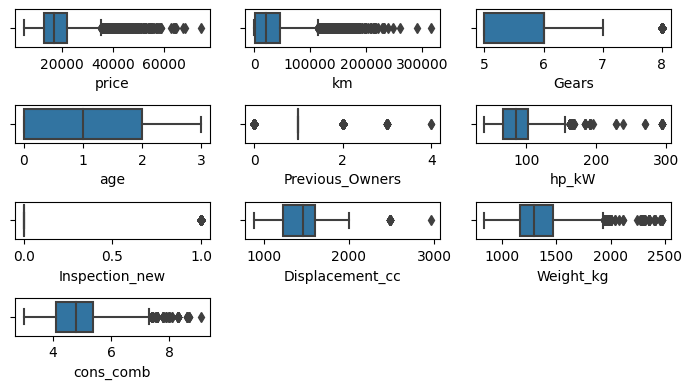

In [45]:
for i,col in enumerate(df0.select_dtypes(include=['number']).columns):
    plt.subplot(4,3,i+1)
    ax=sns.boxplot(x=df0[col])
plt.tight_layout();

#### **feature engineering

In [46]:
df_filled=df0.copy()

In [47]:
df_filled.columns=df_filled.columns.str.lower().copy()

In [48]:
df_filled.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'type', 'fuel',
       'gears', 'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'age', 'previous_owners', 'hp_kw', 'inspection_new',
       'paint_type', 'upholstery_type', 'gearing_type', 'displacement_cc',
       'weight_kg', 'drive_chain', 'cons_comb'],
      dtype='object')

In [49]:
def count_features(text):
    if pd.isna(text):
        return 0
    return len(text.split(','))

In [50]:
df_filled['cc_count'] = df_filled['comfort_convenience'].apply(count_features)
df_filled['em_count'] = df_filled['entertainment_media'].apply(count_features)
df_filled['ss_count'] = df_filled['safety_security'].apply(count_features)
df_filled['ex_count'] = df_filled['extras'].apply(count_features)

In [51]:
df_filled.shape

(15915, 27)

In [52]:
df_filled['ex_density'] = df_filled['ex_count'] /df_filled['price']
df_filled['cc_density'] = df_filled['cc_count'] /df_filled['price']
df_filled['em_density'] = df_filled['em_count'] /df_filled['price']
df_filled['ss_density'] = df_filled['ss_count'] / df_filled['price']

In [53]:
df_filled.shape

(15915, 31)

In [54]:
df_filled['ex_cat'] = pd.cut(
    df_filled['ex_density'],
    bins=[-float('inf'), 0.00015, 0.00035, float('inf')],
    labels=["Basic", "Comfort", "Luxe"]
)

df_filled['cc_cat'] = pd.cut(df_filled['cc_density'],
                             bins=[-float('inf'), 0.0004, 0.0010, float('inf')],
                             labels=["Basic", "Comfort", "Luxe"])

df_filled['em_cat'] = pd.cut(df_filled['em_density'],
                             bins=[-float('inf'), 0.0002, 0.0005, float('inf')],
                             labels=["Basic", "Comfort", "Luxe"])

df_filled['ss_cat'] = pd.cut(df_filled['ss_density'],
                             bins=[-float('inf'), 0.0006, 0.0013, float('inf')],
                             labels=["Basic", "Comfort", "Luxe"])

In [55]:
df_filled.shape

(15915, 35)

In [56]:
df_filled.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'type', 'fuel',
       'gears', 'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'age', 'previous_owners', 'hp_kw', 'inspection_new',
       'paint_type', 'upholstery_type', 'gearing_type', 'displacement_cc',
       'weight_kg', 'drive_chain', 'cons_comb', 'cc_count', 'em_count',
       'ss_count', 'ex_count', 'ex_density', 'cc_density', 'em_density',
       'ss_density', 'ex_cat', 'cc_cat', 'em_cat', 'ss_cat'],
      dtype='object')

In [57]:
df_filled.drop(columns=['cc_count', 'em_count',
       'ss_count', 'ex_count', 'ex_density', 'cc_density', 'em_density',
       'ss_density','comfort_convenience', 'entertainment_media', 'extras',
       'safety_security']).columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'type', 'fuel',
       'gears', 'age', 'previous_owners', 'hp_kw', 'inspection_new',
       'paint_type', 'upholstery_type', 'gearing_type', 'displacement_cc',
       'weight_kg', 'drive_chain', 'cons_comb', 'ex_cat', 'cc_cat', 'em_cat',
       'ss_cat'],
      dtype='object')

In [58]:
df_filled.drop(columns=['cc_count', 'em_count',
       'ss_count', 'ex_count', 'ex_density', 'cc_density', 'em_density',
       'ss_density','comfort_convenience', 'entertainment_media', 'extras',
       'safety_security']).shape

(15915, 23)

In [302]:
df=df_filled.drop(columns=['cc_count', 'em_count',
       'ss_count', 'ex_count', 'ex_density', 'cc_density', 'em_density',
       'ss_density','comfort_convenience', 'entertainment_media', 'extras',
       'safety_security'])

In [303]:
df.shape

(15915, 23)

In [189]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'type', 'fuel',
       'gears', 'age', 'previous_owners', 'hp_kw', 'inspection_new',
       'paint_type', 'upholstery_type', 'gearing_type', 'displacement_cc',
       'weight_kg', 'drive_chain', 'cons_comb', 'ex_cat', 'cc_cat', 'em_cat',
       'ss_cat'],
      dtype='object')

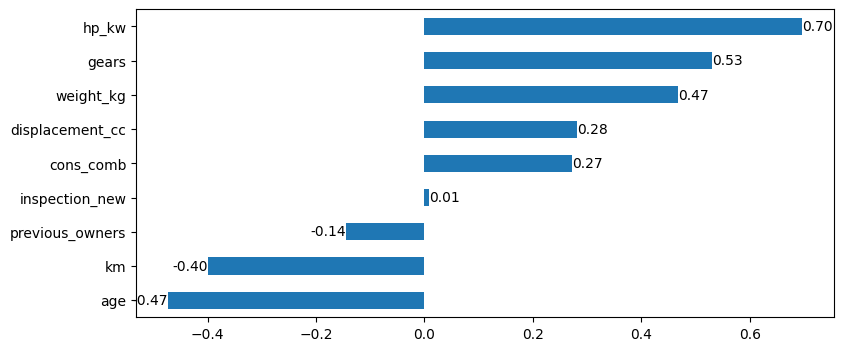

In [190]:
plt.figure(figsize=(9,4))
ax = df.corr()["price"].drop("price").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f');

In [191]:
#####

In [192]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

In [193]:
cat_df = df.select_dtypes(exclude=['number']).columns
cat_df

Index(['make_model', 'body_type', 'vat', 'type', 'fuel', 'paint_type',
       'upholstery_type', 'gearing_type', 'drive_chain', 'ex_cat', 'cc_cat',
       'em_cat', 'ss_cat'],
      dtype='object')

In [118]:
ord_enc = OrdinalEncoder()
column_trans = make_column_transformer((ord_enc, cat_df), remainder='passthrough', verbose_feature_names_out=False).set_output(transform="pandas")

In [119]:
df_ordinal = column_trans.fit_transform(df)


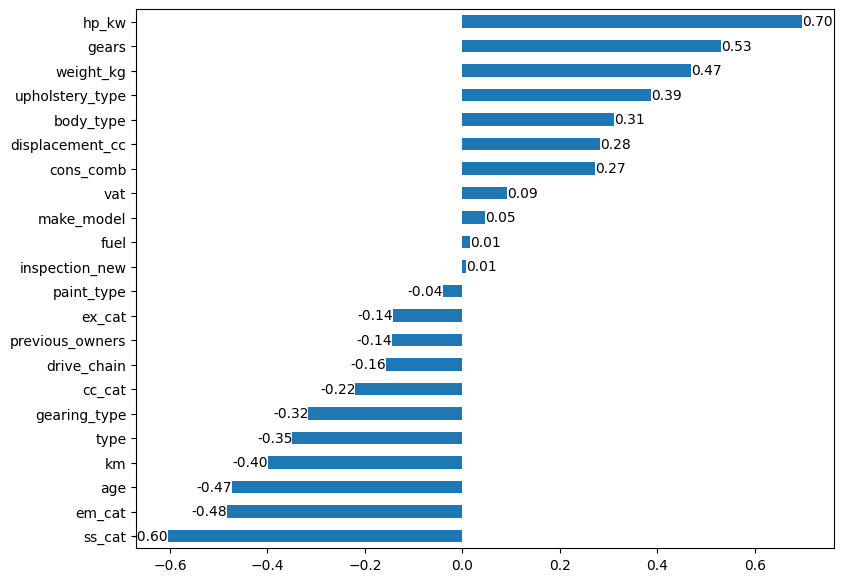

In [120]:
plt.figure(figsize=(9,7))
ax = df_ordinal.corr()["price"].drop("price").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f');

In [194]:
new_list1=['price','make_model','km','type','gears','age','hp_kw','upholstery_type','gearing_type','cons_comb','em_cat','ss_cat']
new_list1

['price',
 'make_model',
 'km',
 'type',
 'gears',
 'age',
 'hp_kw',
 'upholstery_type',
 'gearing_type',
 'cons_comb',
 'em_cat',
 'ss_cat']

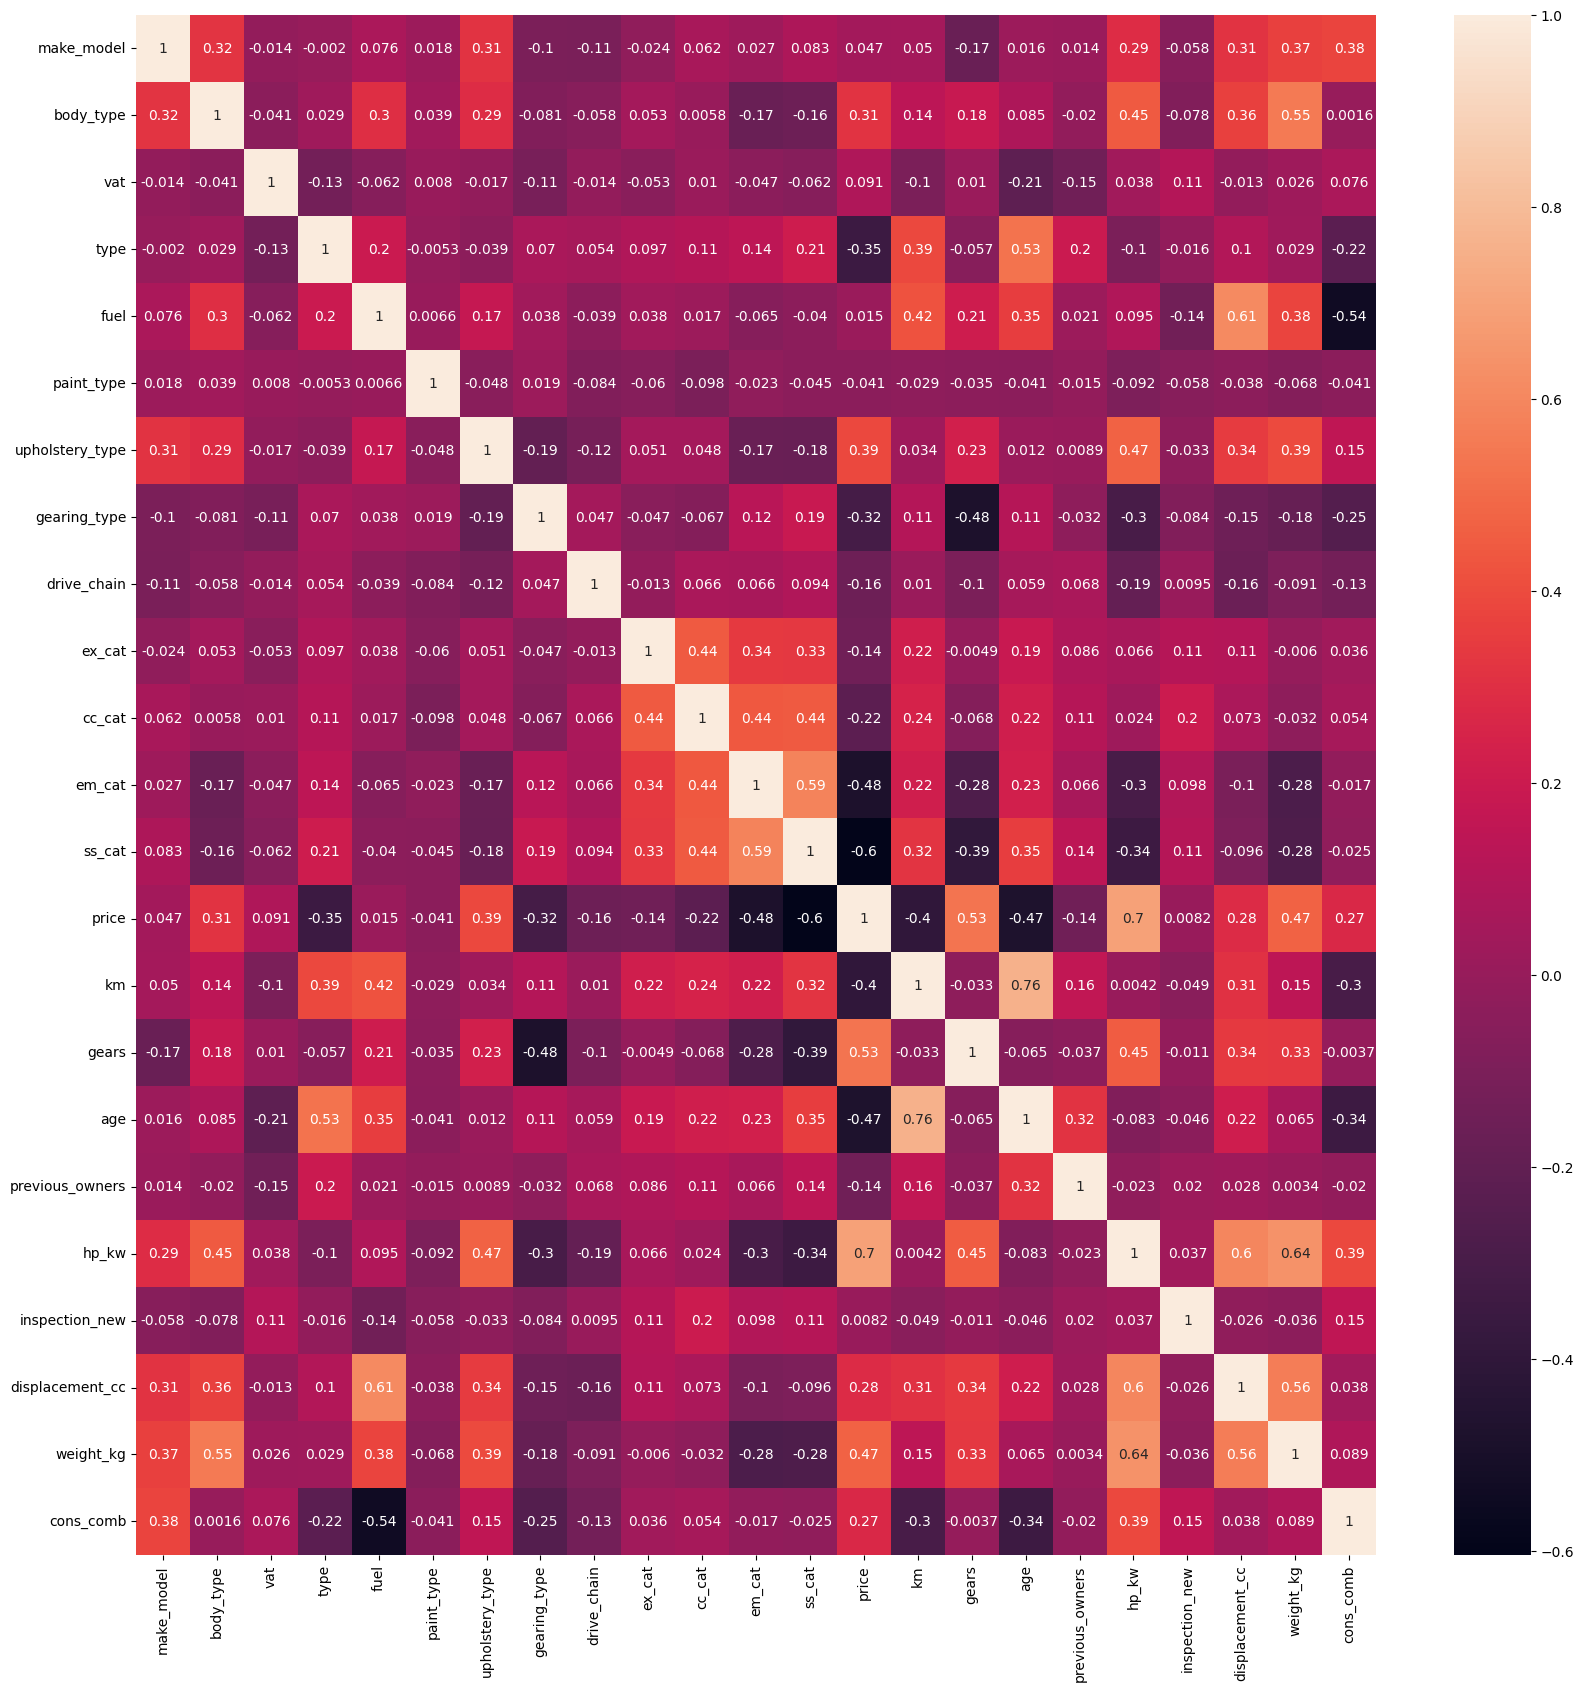

In [128]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df_ordinal.corr(numeric_only=True), annot=True);

In [195]:
df_ordinal1=df_ordinal[new_list1].copy()

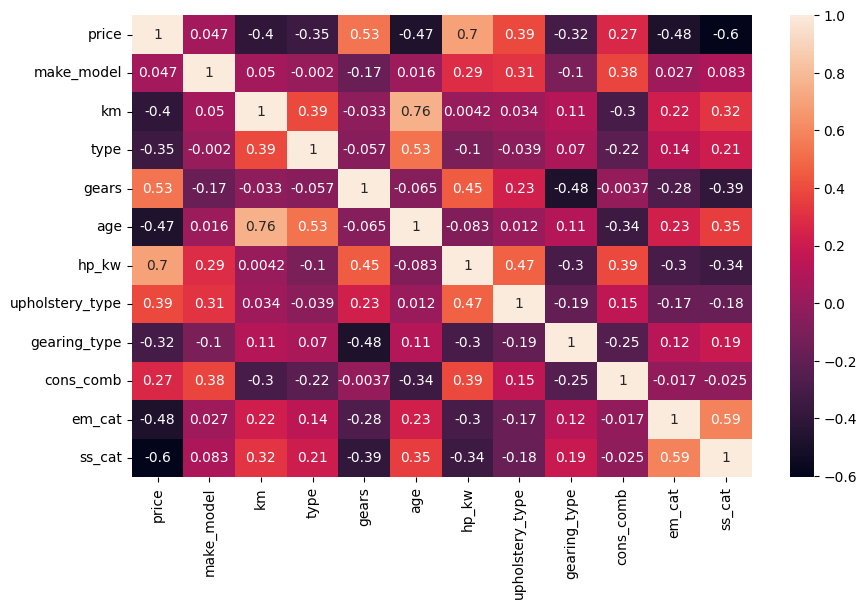

In [136]:
plt.figure(figsize=(10,6))
sns.heatmap(df_ordinal1.corr(numeric_only=True), annot=True);

In [ ]:
####

In [304]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [305]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,type,fuel,gears,age,previous_owners,...,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb,ex_cat,cc_cat,em_cat,ss_cat
2614,Audi A2,Off-Road,28200,VAT deductible,26166.0,Employee's car,Diesel,6.0,1.0,1.0,...,Cloth,Manual,1598.0,1135.0,front,4.9,Basic,Comfort,Comfort,Basic


In [306]:
df.drop(index=[2614], inplace =True)

In [307]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Name: make_model, dtype: int64

In [308]:
df.shape

(15914, 23)

In [309]:
new_list2=["price","age", "hp_kW", "km", "Gearing_Type", 'make_model']

In [310]:
new_list=new_list1

In [311]:
df[new_list].shape

(15914, 12)

In [204]:
X = df[new_list].drop(["price"], axis=1)
y=df['price']

In [205]:
X.shape

(15914, 11)

## Train | Test Split

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

### Split the Data into train, validation and test data

In [260]:
# Split the data as train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #stratify=y is used for categorical values



In [237]:
# Split the train data as train and validation datasets
#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [261]:
# checking the shapes of datasets
X_train.shape, X_test.shape #, X_validation.shape,

((12731, 11), (3183, 11))

In [262]:
# checking the shapes of datasets
y_train.shape,  y_test.shape #,y_validation.shape

((12731,), (3183,))

### Ordinal Encoder

In [263]:
cat = X_train.select_dtypes(exclude=['number']).columns
cat

Index(['make_model', 'type', 'upholstery_type', 'gearing_type', 'em_cat',
       'ss_cat'],
      dtype='object')

In [264]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12731 entries, 14306 to 7271
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   make_model       12731 non-null  object  
 1   km               12731 non-null  float64 
 2   type             12731 non-null  object  
 3   gears            12731 non-null  float64 
 4   age              12731 non-null  float64 
 5   hp_kw            12731 non-null  float64 
 6   upholstery_type  12731 non-null  object  
 7   gearing_type     12731 non-null  object  
 8   cons_comb        12731 non-null  float64 
 9   em_cat           12731 non-null  category
 10  ss_cat           12731 non-null  category
dtypes: category(2), float64(5), object(4)
memory usage: 1019.7+ KB


In [265]:
ord_enc = OrdinalEncoder()
column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough', verbose_feature_names_out=False).set_output(transform="pandas")

In [266]:
X_train = column_trans.fit_transform(X_train)
#X_validation = column_trans.transform(X_validation)
X_test= column_trans.transform(X_test)

In [267]:
X_train.head()

,make_model,type,upholstery_type,gearing_type,em_cat,ss_cat,km,gears,age,hp_kw,cons_comb
14306,5.0,4.0,0.0,1.0,2.0,1.0,6332.0,5.0,0.0,56.0,5.0
2582,0.0,3.0,0.0,1.0,1.0,1.0,500.0,5.0,0.0,85.0,4.8
6303,2.0,4.0,0.0,1.0,2.0,1.0,78234.0,6.0,3.0,81.0,3.5
9157,3.0,4.0,0.0,1.0,2.0,1.0,9100.0,5.0,2.0,51.0,5.6
15663,7.0,3.0,1.0,0.0,0.0,0.0,100.0,6.0,1.0,165.0,6.8


In [268]:
#X_validation.head()

In [269]:
X_test.head()

,make_model,type,upholstery_type,gearing_type,em_cat,ss_cat,km,gears,age,hp_kw,cons_comb
12887,4.0,0.0,0.0,1.0,0.0,1.0,5900.0,6.0,0.0,100.0,4.8
8141,2.0,0.0,0.0,1.0,0.0,1.0,1900.0,5.0,0.0,66.0,4.9
6836,2.0,4.0,0.0,1.0,1.0,1.0,39792.0,6.0,2.0,81.0,3.5
12468,4.0,3.0,1.0,0.0,0.0,0.0,10.0,8.0,0.0,154.0,7.1
1213,0.0,4.0,0.0,1.0,1.0,1.0,11903.0,5.0,2.0,60.0,4.2


In [ ]:
#####

In [270]:
from sklearn.ensemble import RandomForestRegressor

In [271]:
rf_model=RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [272]:
y_pred = rf_model.predict(X_test)

In [273]:
eval_metrics(y_test, y_pred)

 r2_score: 0.9400530431519343 
 mae: 1014.7315061495116 
 mse: 3284653.2577416436 
 rmse: 1812.3612382032572 
 mape: 0.05519257043377827


In [ ]:
#####

In [284]:
import pickle
#pickle.dump(rf_model, open('rf_model', 'wb'))

In [285]:
#pickle.dump(column_trans, open('transformer', 'wb'))

In [327]:
pickle.dump(rf_model, open('C:/AWS/project1/project1_app_deployment/rf_model', 'wb'))

In [328]:
pickle.dump(column_trans, open('C:/AWS/project1/project1_app_deployment/transformer', 'wb'))

### **deployment**

In [286]:
#model = pickle.load(open('rf_model', 'rb'))

In [329]:
model = pickle.load(open('C:/AWS/project1/project1_app_deployment/rf_model', 'rb'))

In [330]:
#transformer = pickle.load(open('transformer', 'rb'))

In [331]:
transformer = pickle.load(open('C:/AWS/project1/project1_app_deployment/transformer', 'rb'))

In [332]:
new_list

['price',
 'make_model',
 'km',
 'type',
 'gears',
 'age',
 'hp_kw',
 'upholstery_type',
 'gearing_type',
 'cons_comb',
 'em_cat',
 'ss_cat']

In [333]:
len(new_list)

12

In [334]:
df[df[ "make_model"]== 'Audi A3'].head()

,make_model,body_type,price,vat,km,type,fuel,gears,age,previous_owners,...,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb,ex_cat,cc_cat,em_cat,ss_cat
2615,Audi A3,Convertible,10893,VAT deductible,19800.0,Used,Benzine,7.0,1.0,1.0,...,Part/Full Leather,Automatic,1498.0,1470.0,front,5.1,Comfort,Luxe,Luxe,Luxe
2616,Audi A3,Sedans,13000,Price negotiable,36792.0,Used,Diesel,7.0,2.0,1.0,...,Part/Full Leather,Automatic,1598.0,1255.0,front,4.0,Comfort,Comfort,Comfort,Comfort
2617,Audi A3,Sedans,15450,VAT deductible,149006.0,Used,Diesel,7.0,3.0,1.0,...,Part/Full Leather,Automatic,1598.0,1360.0,front,4.0,Basic,Basic,Comfort,Comfort
2618,Audi A3,Sedans,15680,VAT deductible,141147.0,Used,Diesel,7.0,3.0,1.0,...,Part/Full Leather,Automatic,1968.0,1360.0,front,4.0,Comfort,Comfort,Basic,Comfort
2619,Audi A3,Sedans,16490,Price negotiable,44500.0,Used,Diesel,7.0,3.0,1.0,...,Part/Full Leather,Automatic,1598.0,1360.0,front,4.0,Comfort,Luxe,Luxe,Comfort


In [335]:
my_dict = {
    "age": 2,
    "hp_kw": 105,
    "km": 100000,
    "gearing_type":"Automatic",
    'gears':4,
    "make_model": 'Audi A3',
    'type':'Used',
    'upholstery_type':'Part/Full Leather',
    'cons_comb': 5.1,
    'em_cat':'Comfort',
    'ss_cat': 'Comfort'
}

In [336]:
df1 = pd.DataFrame.from_dict([my_dict])

In [337]:
df1.head()

,age,hp_kw,km,gearing_type,gears,make_model,type,upholstery_type,cons_comb,em_cat,ss_cat
0,2,105,100000,Automatic,4,Audi A3,Used,Part/Full Leather,5.1,Comfort,Comfort


In [338]:
df2 = transformer.transform(df1)

In [339]:
df2

,make_model,type,upholstery_type,gearing_type,em_cat,ss_cat,km,gears,age,hp_kw,cons_comb
0,1.0,4.0,1.0,0.0,1.0,1.0,100000,4,2,105,5.1


In [340]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make_model       1 non-null      float64
 1   type             1 non-null      float64
 2   upholstery_type  1 non-null      float64
 3   gearing_type     1 non-null      float64
 4   em_cat           1 non-null      float64
 5   ss_cat           1 non-null      float64
 6   km               1 non-null      int64  
 7   gears            1 non-null      int64  
 8   age              1 non-null      int64  
 9   hp_kw            1 non-null      int64  
 10  cons_comb        1 non-null      float64
dtypes: float64(7), int64(4)
memory usage: 216.0 bytes


In [341]:
prediction = model.predict(df2)
prediction

array([18564.73])

In [342]:
print("The estimated price of your car is €{}. ".format(int(prediction[0])))

The estimated price of your car is €18564. 


In [343]:
!streamlit run my_app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: my_app.py


In [ ]:
####